# Task 1

---

## Web scraping


### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.shape

(1000, 1)

## Task 2: Data Cleaning

In [6]:
import re 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import string 
import nltk 
import textblob
from textblob import TextBlob
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [7]:
#create a function to remove unwanted text patterns from the reviews
def remove_pattern(input_review):             
        input_review = re.sub('✅ Trip Verified |', '', input_review)              
        return input_review

In [8]:
df["reviews"] = df["reviews"].apply(remove_pattern)

In [9]:
df.head()

,reviews
0,"| Check in was so slow, no self check in and ..."
1,| My review relates to the appalling experien...
2,| This was my first time flying with BA & I wa...
3,| Lots of cancellations and delays and no one...
4,| BA 242 on the 6/2/23. Boarding was delayed d...


**Remove Punctuation and Stopwords**

In [10]:
#let’s get all the punctuation.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
punctuation  = string.punctuation

In [12]:
#import natural language tool kit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vimoney\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
def review_cleaning(review):
    review_punc_removed = [char for char in review if char not in punctuation]
    review_punc_removed_join = ''.join(review_punc_removed)
    review_stopwords_removed = [word for word in review_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    review_clean = ' '.join(review_stopwords_removed)
    return review_clean

In [14]:
df['reviews'] = df['reviews'].apply(review_cleaning)

In [15]:
df.head()

,reviews
0,Check slow self check bag drop Boarding ok fli...
1,review relates appalling experiences British A...
2,first time flying BA pleasantly surprised Isla...
3,Lots cancellations delays one apologized Edinb...
4,BA 242 6223 Boarding delayed due late arrival ...


**Lemmatization**

In [16]:
#Tokenization of review

def tokenization(review):
    review = re.split('\W+', review)
    return review

In [17]:
df['reviews_tokenized'] = df['reviews'].apply(lambda x: tokenization(x.lower()))

In [18]:
df.head()

,reviews,reviews_tokenized
0,Check slow self check bag drop Boarding ok fli...,"[check, slow, self, check, bag, drop, boarding..."
1,review relates appalling experiences British A...,"[review, relates, appalling, experiences, brit..."
2,first time flying BA pleasantly surprised Isla...,"[first, time, flying, ba, pleasantly, surprise..."
3,Lots cancellations delays one apologized Edinb...,"[lots, cancellations, delays, one, apologized,..."
4,BA 242 6223 Boarding delayed due late arrival ...,"[ba, 242, 6223, boarding, delayed, due, late, ..."


In [19]:
#Lemmatization
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(review):
    review = [wn.lemmatize(word) for word in review]
    review = " ".join(review)
    return review

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vimoney\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df['reviews_lemmatized'] = df['reviews_tokenized'].apply(lambda x: lemmatizer(x))

In [21]:
df.head()

,reviews,reviews_tokenized,reviews_lemmatized
0,Check slow self check bag drop Boarding ok fli...,"[check, slow, self, check, bag, drop, boarding...",check slow self check bag drop boarding ok fli...
1,review relates appalling experiences British A...,"[review, relates, appalling, experiences, brit...",review relates appalling experience british ai...
2,first time flying BA pleasantly surprised Isla...,"[first, time, flying, ba, pleasantly, surprise...",first time flying ba pleasantly surprised isla...
3,Lots cancellations delays one apologized Edinb...,"[lots, cancellations, delays, one, apologized,...",lot cancellation delay one apologized edinburg...
4,BA 242 6223 Boarding delayed due late arrival ...,"[ba, 242, 6223, boarding, delayed, due, late, ...",ba 242 6223 boarding delayed due late arrival ...


In [22]:
df.drop(columns = ['reviews', 'reviews_tokenized'])

,reviews_lemmatized
0,check slow self check bag drop boarding ok fli...
1,review relates appalling experience british ai...
2,first time flying ba pleasantly surprised isla...
3,lot cancellation delay one apologized edinburg...
4,ba 242 6223 boarding delayed due late arrival ...
...,...
995,los angeles london heathrow return outbound fi...
996,hamburg abu dhabi via london hamburg heathrow ...
997,overnight club world flight rio london check r...
998,london heathrow vancouver 747 route old worn a...


## Task 3: Sentiment Analysis

In [23]:
# Function for polarity score
def polarity(review):
    return TextBlob(review).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [24]:
# using the functions to get the polarity and sentiment for luxworld_tweet
df['Polarity'] = df['reviews_lemmatized'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
review_count = df['Sentiment'].value_counts()
review_count

Positive    674
Negative    311
Neutral      15
Name: Sentiment, dtype: int64

## Task 4: Data Visualization

**Countplot the Sentiment**

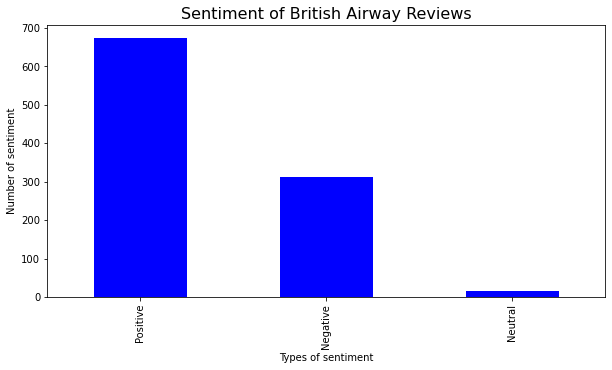

In [27]:
#ploting bar chart for the Sentiment of British Airway

review_count.plot(kind='bar', color = 'blue', figsize = (10,5))
plt.title("Sentiment of British Airway Reviews", fontsize = 16)
plt.xlabel("Types of sentiment")
plt.ylabel("Number of sentiment")
plt.show()

**Pie Chart for Distribution of Sentiment**

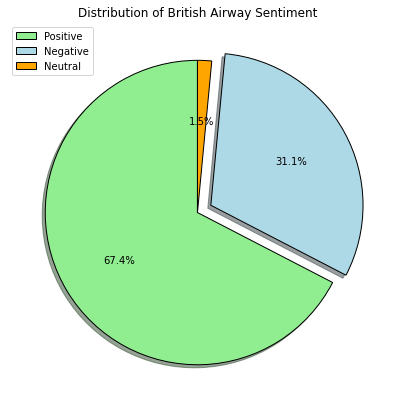

In [32]:
fig, ax = plt.subplots(figsize =(10, 7))
explode=(0,0.1,0)
colors = ('lightgreen', 'lightblue', 'orange')
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

ax.pie(review_count, autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode = explode)
ax.set_title('Distribution of British Airway Sentiment')
ax.legend(review_count.keys().tolist())

**WordCloud Visualization**

In [33]:
!pip install wordcloud

In [38]:
from wordcloud import WordCloud

In [34]:
# convert the review text into a string separate with " "
review_string = df['reviews_lemmatized'].tolist()
review_string[:10]

['check slow self check bag drop boarding ok flight totally full booked row 9 ok space overhead bin seat legroom ok cabin crew ok smiled gave bottle water pretzel flight ok landed 25 min early waited 30 minute stand ground crew bag came reasonably quickly ba still seems believe something special premium carrier reality reason flew ba got virtually free ticket flight cancelled last year ba carrier last choice',
 'review relates appalling experience british airway 14th february 2023 due travel madrid british airway setting heard radio flight delay looked heathrow airport website saw flight cancelled result information website called british airway 26 minute hold found speaking somebody call centre south africa person hard understand due heavy accent incompetent insisted flight cancelled made way heathrow sure enough flight indeed cancelled woman question audacity declare flight cancelled there facility airport rebook you refused let 12 people join queue clearly marked assistance desk wom

In [35]:
review_string = ' '.join(review_string)

In [36]:
review_string[:10]

'check slow'

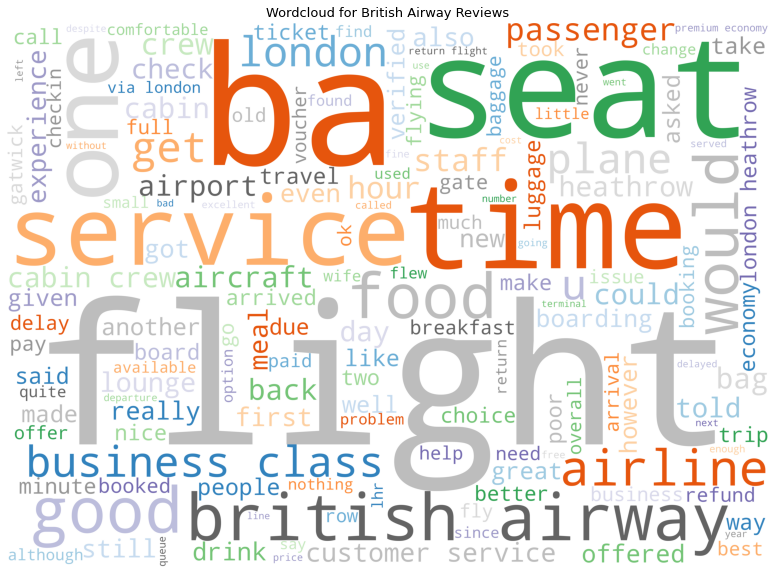

In [40]:
#Define a list of stop words

#A function to generate the word cloud from text
def generate_wordcloud(data, title, stopwords, color, bcolor):
    cloud = WordCloud(width=7000,
                      height=5000,
                      max_words=150,
                      colormap=color,
                      background_color=bcolor,
                      stopwords=stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(16,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()
#Use the function to generate the word cloud
generate_wordcloud(review_string, 
                   'Wordcloud for British Airway Reviews', 
                   ['British Airway', 'british airway'], 'tab20c', 'white')
    

In [41]:
# Taking separate dataframes for different values such as positive, negative reviews respectively for British Aiway reviews

positive_review = df[df['Sentiment'] == 'Positive']
negative_review = df[df['Sentiment'] == 'Negative']

In [42]:
positive_review.head()

,reviews,reviews_tokenized,reviews_lemmatized,Polarity,Sentiment
0,Check slow self check bag drop Boarding ok fli...,"[check, slow, self, check, bag, drop, boarding...",check slow self check bag drop boarding ok fli...,0.310034,Positive
2,first time flying BA pleasantly surprised Isla...,"[first, time, flying, ba, pleasantly, surprise...",first time flying ba pleasantly surprised isla...,0.347727,Positive
3,Lots cancellations delays one apologized Edinb...,"[lots, cancellations, delays, one, apologized,...",lot cancellation delay one apologized edinburg...,0.125000,Positive
4,BA 242 6223 Boarding delayed due late arrival ...,"[ba, 242, 6223, boarding, delayed, due, late, ...",ba 242 6223 boarding delayed due late arrival ...,0.468750,Positive
5,first flight 17 years also first time back Eng...,"[first, flight, 17, years, also, first, time, ...",first flight 17 year also first time back engl...,0.211944,Positive


In [43]:
negative_review.head()

,reviews,reviews_tokenized,reviews_lemmatized,Polarity,Sentiment
1,review relates appalling experiences British A...,"[review, relates, appalling, experiences, brit...",review relates appalling experience british ai...,-0.030177,Negative
14,flight one worst ever life wanted pamper bough...,"[flight, one, worst, ever, life, wanted, pampe...",flight one worst ever life wanted pamper bough...,-0.052760,Negative
15,Verified seems race bottom amongst airlines ca...,"[verified, seems, race, bottom, amongst, airli...",verified seems race bottom amongst airline can...,-0.142500,Negative
21,Flew ATL LHR 8th Jan 2023 unlucky enough board...,"[flew, atl, lhr, 8th, jan, 2023, unlucky, enou...",flew atl lhr 8th jan 2023 unlucky enough board...,-0.128452,Negative
23,Verified staff friendly plane cold shivering g...,"[verified, staff, friendly, plane, cold, shive...",verified staff friendly plane cold shivering g...,-0.065833,Negative


In [44]:
positive_string = positive_review['reviews_lemmatized'].tolist()
positive_string = ' '.join(positive_string)

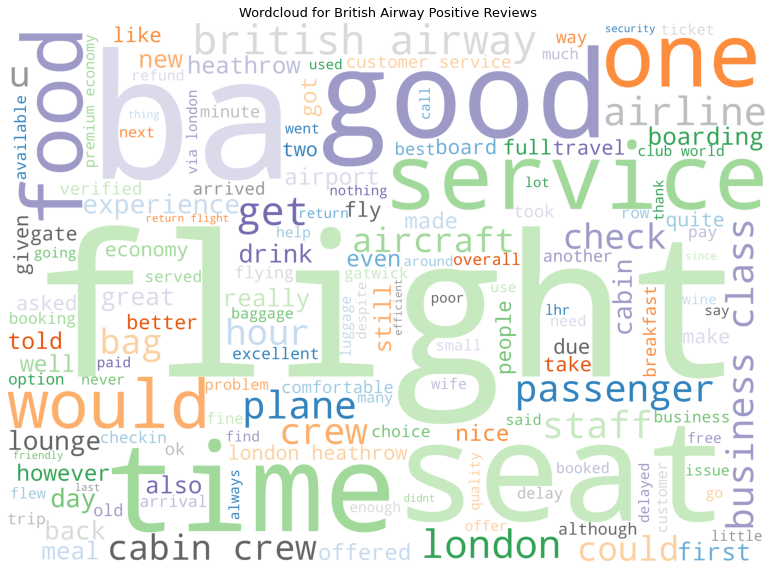

In [45]:
generate_wordcloud(positive_string, 
                   'Wordcloud for British Airway Positive Reviews', 
                   ['British Airway', 'british airway'], 'tab20c', 'white')

From this wordcloud for postive reviews, we can see that the most frequently words are time, good, Ba, seat, customer service, staff, crew, food

In [46]:
negative_string = negative_review['reviews_lemmatized'].tolist()
negative_string = ' '.join(negative_string)

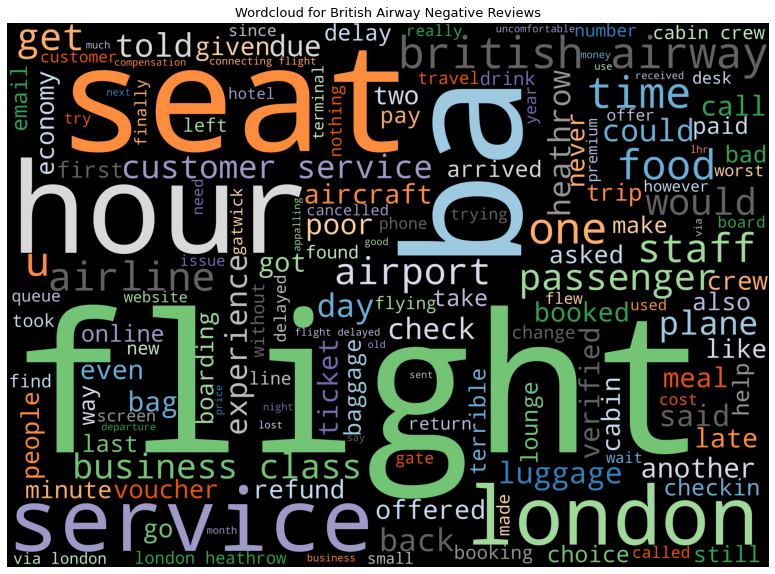

In [48]:
generate_wordcloud(negative_string, 
                   'Wordcloud for British Airway Negative Reviews', 
                   ['British Airway', 'british airway'], 'tab20c', 'black')

For the wordcloud for negative reviews, **service, hour, check, luggage, passenger, refund, london** appear the most. 

**Key Topics**

In [50]:
#make dataframe for every word and its occurrence of British Airway reviews
list_words = [ x for x in review_string.split()] #list of review words
freq_words = nltk.FreqDist(list_words) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_words.keys()), 'Count': list(freq_words.values())}) #data frame of words and count

In [51]:
# selecting top 20 most frequent words
freq_dataframe = freq_dataframe.nlargest(columns='Count', n = 20)

In [52]:
freq_dataframe.head()

,Words,Count
7,flight,2025
37,ba,1176
16,seat,980
151,service,758
245,london,668


C:\Users\Vimoney\AppData\Local\Temp/ipykernel_9352/17560025.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(freq_dataframe['Words'], rotation=90)


[Text(0, 0, 'flight'),
 Text(1, 0, 'ba'),
 Text(2, 0, 'seat'),
 Text(3, 0, 'service'),
 Text(4, 0, 'london'),
 Text(5, 0, 'time'),
 Text(6, 0, 'crew'),
 Text(7, 0, 'food'),
 Text(8, 0, 'hour'),
 Text(9, 0, 'good'),
 Text(10, 0, 'class'),
 Text(11, 0, 'cabin'),
 Text(12, 0, 'one'),
 Text(13, 0, 'airline'),
 Text(14, 0, 'staff'),
 Text(15, 0, 'business'),
 Text(16, 0, 'british'),
 Text(17, 0, 'would'),
 Text(18, 0, 'airway'),
 Text(19, 0, 'get')]

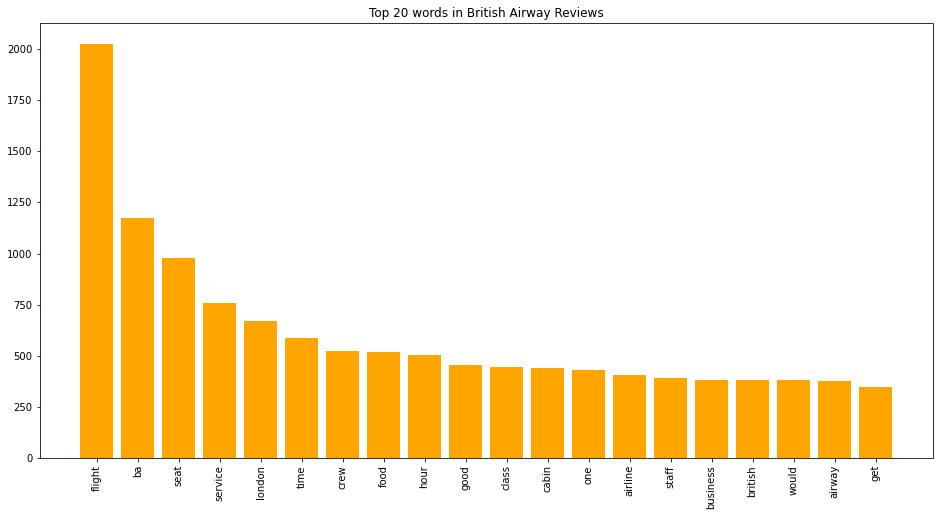

In [55]:
# Create a figure 
fig, ax = plt.subplots(figsize = (16,8))

# Create a bar plot of word vs count on the first axis
ax.bar(x=freq_dataframe['Words'], height=freq_dataframe['Count'], color='orange')
ax.set_title('Top 20 words in British Airway Reviews')
ax.set_xticklabels(freq_dataframe['Words'], rotation=90)